In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [ ]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading the dataset

In [ ]:
dataset_location = "/content/drive/MyDrive/school/ML/firstYear/Datasets/FRC-winner-prediction.csv"
df = pd.read_csv(dataset_location)

# Checking and handling with missing data

Printing info about the dataset

In [ ]:
df.describe()

,matchNumber,red1,red1winRatio,red1Rank,red2,red2winRatio,red2Rank,red3,red3winRatio,red3Rank,blue1,blue1winRatio,blue1Rank,blue2,blue2winRatio,blue2Rank,blue3,blue3winRatio,blue3Rank,hasPopularTeam
count,4155.000000,4155.000000,4155.000000,4087.000000,4155.000000,4155.000000,4087.000000,4155.000000,4155.000000,4087.000000,4155.000000,4155.000000,4087.000000,4155.000000,4155.000000,4087.000000,4155.000000,4155.000000,4087.000000,4155.000000
mean,26.350421,4674.622623,1.250697,18.990458,4542.579783,1.423653,17.740152,4512.901324,1.394708,18.065818,4559.249579,1.268851,18.529484,4531.899639,1.305352,17.978713,4652.631047,1.172507,19.197455,-0.002407
std,23.300789,2707.281584,1.450177,11.797552,2705.435466,1.653682,12.264682,2725.341710,1.574933,12.238126,2723.353359,1.416755,11.901560,2725.810694,1.419551,11.987809,2681.469401,1.314473,11.506746,0.116083
min,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,-1.000000
25%,6.000000,2443.000000,0.444444,9.000000,2224.000000,0.500000,7.000000,2205.500000,0.500000,7.000000,2240.000000,0.500000,9.000000,2224.000000,0.500000,8.000000,2449.000000,0.444444,10.000000,0.000000
50%,17.000000,4613.000000,0.857143,18.000000,4534.000000,0.857143,16.000000,4450.000000,0.857143,17.000000,4522.000000,0.857143,17.000000,4453.000000,0.857143,17.000000,4611.000000,0.857143,19.000000,0.000000
75%,44.500000,6887.500000,1.400000,27.000000,6700.000000,1.600000,27.000000,6729.000000,1.600000,27.000000,6844.000000,1.600000,27.000000,6832.000000,1.600000,26.000000,6864.000000,1.200000,27.000000,0.000000
max,94.000000,9315.000000,13.000000,60.000000,9315.000000,12.000000,60.000000,9315.000000,12.000000,60.000000,9315.000000,13.000000,60.000000,9315.000000,13.000000,60.000000,9313.000000,12.000000,60.000000,1.000000


Checking if there is missing data

In [ ]:
print(df.shape)
print(df.isnull().values.any())

(4155, 21)
True


Checking how many are missing

In [ ]:
df.isna().sum().sum()

525

Filtering the dataset to remove null values as there are not a lot of them

In [ ]:
df.dropna(inplace=True)

Checking the filtered dataset to check if there are any null values left

In [ ]:
print(df.shape)
print(df.isnull().values.any())

(4038, 21)
False


Checking paramters type

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4038 entries, 0 to 4154
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   matchNumber     4038 non-null   int64  
 1   red1            4038 non-null   int64  
 2   red1winRatio    4038 non-null   float64
 3   red1Rank        4038 non-null   float64
 4   red2            4038 non-null   int64  
 5   red2winRatio    4038 non-null   float64
 6   red2Rank        4038 non-null   float64
 7   red3            4038 non-null   int64  
 8   red3winRatio    4038 non-null   float64
 9   red3Rank        4038 non-null   float64
 10  blue1           4038 non-null   int64  
 11  blue1winRatio   4038 non-null   float64
 12  blue1Rank       4038 non-null   float64
 13  blue2           4038 non-null   int64  
 14  blue2winRatio   4038 non-null   float64
 15  blue2Rank       4038 non-null   float64
 16  blue3           4038 non-null   int64  
 17  blue3winRatio   4038 non-null   f

# Exploring the data

Text(0.5, 1.0, 'Winner Count')

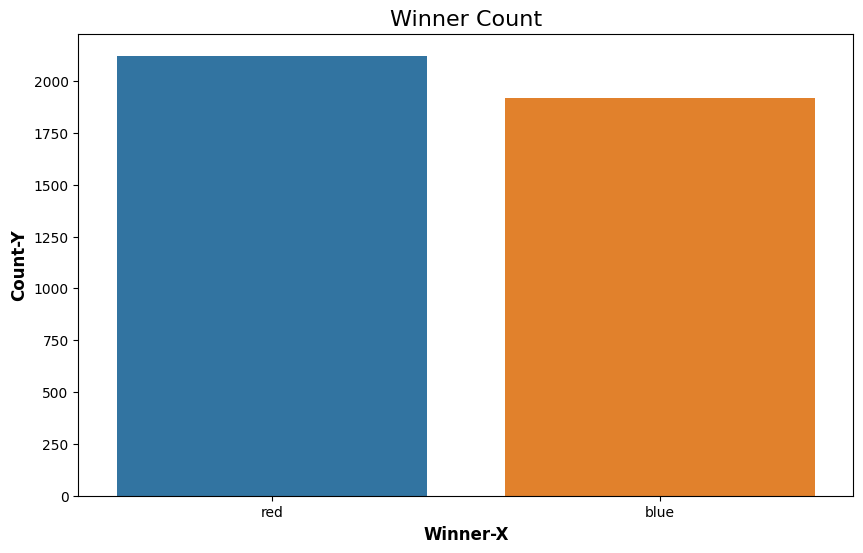

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='winner')
plt.xlabel('Winner-X', fontsize = 12, fontweight='bold')
plt.ylabel('Count-Y', fontsize = 12, fontweight='bold')
plt.title('Winner Count', fontsize = 16)

We can learn from this graph that there are no draws

Text(0.5, 1.0, 'Has Popular Team Count')

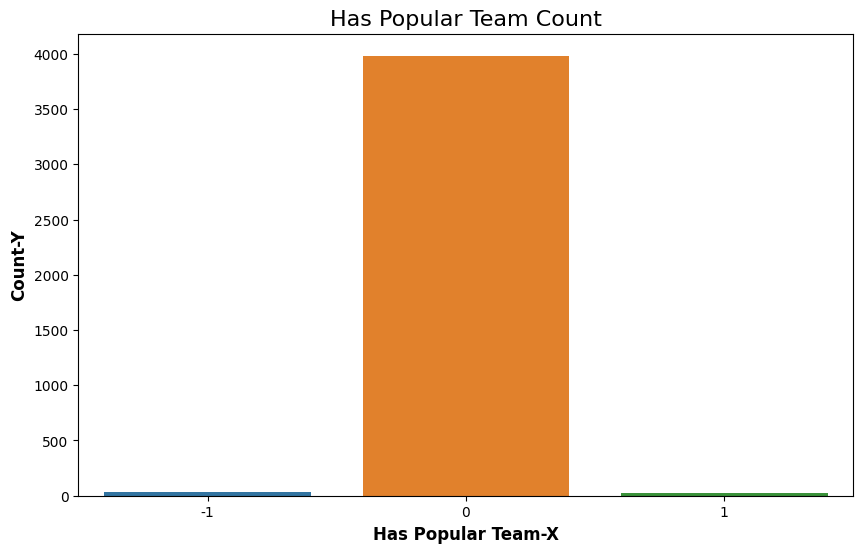

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='hasPopularTeam')
plt.xlabel('Has Popular Team-X', fontsize = 12, fontweight='bold')
plt.ylabel('Count-Y', fontsize = 12, fontweight='bold')
plt.title('Has Popular Team Count', fontsize = 16)

We can learn that most matchs do not contain a popular team

# Creating the models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

In [ ]:
from itertools import product
import progressbar

In [ ]:
# !pip install ml-hyperparameters==0.0.2
# from ml_hyperparameters import *

Seperating the dataset to x and y, when X is the input paramters and y is the result.

ignoring "hasPopularTeam" paramter as it is not relevant because most matches does not contain a popular team, and team popularity does not reflect how good their robot is.

Also, ignoring the win to loss ratio, as it does not effect the results that much compared to the amount of data given and is hard to get during a competition

In [ ]:
X = df[['matchNumber', 'red1', 'red1Rank', 'red2',
           'red2Rank', 'red3', 'red3Rank', 'blue1',
            'blue1Rank', 'blue2',  'blue2Rank', 'blue3',  'blue3Rank',
            ]]
y = df['winner']

Splitting the dataset to train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def create_bar(max_value):
  widgets = [' [',
           progressbar.Counter(format='%(value)d/%(max_value)d'), '',
           '] (',
           progressbar.ETA(), ') ',
          ]

  bar = progressbar.ProgressBar(max_value=max_value, widgets=widgets).start()
  return bar

In [ ]:
def print_params(accuracy, param_grid: dict):
  print("\nBest Params:")
  print(f"\tAccuracy: {accuracy * 100}%")
  for key in list(param_grid.keys()):
    print(f"\t{key}: {param_grid[key]}")

This function takes a param grid, a model, x, y and preprocess
and finds the best hyperparameters for the model

In [ ]:
def find_best_params(param_grid: dict, model, X, y, preprocess):
  if preprocess:
    model_X_train = preprocessing.scale(X)
  else:
    model_X_train = X

  original_times_left = len(list(product(*param_grid.values())))
  times_left = original_times_left
  bar = create_bar(original_times_left)

  best_score = 0
  best_params = {}

  scores_num = 5

  for params in product(*param_grid.values()):
      params_dict = dict(zip(param_grid.keys(), params))
      model = type(model)(**params_dict)
      scores = cross_val_score(model, model_X_train[::10], y[::10], cv=scores_num)
      accuracy = sum(scores)/scores_num

      times_left -= 1
      bar.update(original_times_left - times_left)

      if accuracy > best_score:
          best_score = accuracy
          best_params = params_dict

  print_params(best_score, best_params)


Finding the best hyperparamters for SVM

In [ ]:
param_grid = {
    "C": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 25, 50, 75, 100],
    "gamma": [0.1, 0.5, 0.8, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 25, 50, 75, 100],
    "kernel": ['linear', 'poly', 'rbf', 'sigmoid']
}
find_best_params(param_grid, SVC(), X, y, True)

 [951/952] (ETA:   0:00:00)                                                    


Best Params:
	Accuracy: 86.62962962962963%
	C: 2
	gamma: 0.1
	kernel: linear


Training the SVM algorithem with the best parameters with all the data

In [ ]:
svm = SVC(C=2, gamma=0.1, kernel='linear')
svm.fit(X_train, y_train)

SVC(C=2, gamma=0.1, kernel='linear')

Calculating the accuracy for the model

In [ ]:
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {(accuracy * 100):.2f}%")

Accuracy: 83.04%


Printing the confusion matrix

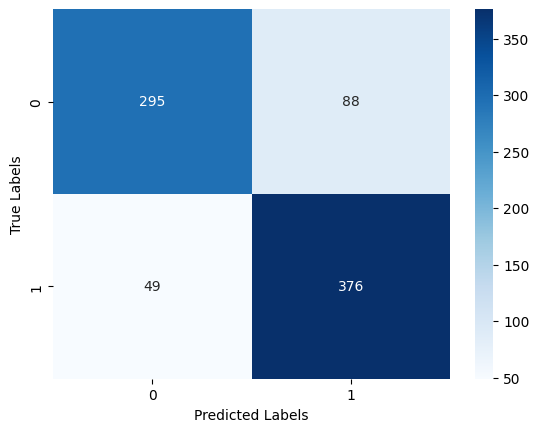

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Finding best hyperparamters for second algorithm, RandomForest

In [ ]:
param_grid = {
    'n_estimators': [400, 450, 500, 550],
    'max_depth': [5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10, 20, 25],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'criterion': ['gini', 'entropy']
}
find_best_params(param_grid, RandomForestClassifier(), X, y, False)

 [1000/1000] (ETA:  00:00:00)                                                  


Best Params:
	Accuracy: 84.88888888888889%
	n_estimators: 500
	max_depth: 25
	min_samples_split: 2
	min_samples_leaf: 1
	criterion: entropy

Best Params:
	Accuracy: 84.88888888888889%
	n_estimators: 500
	max_depth: 25
	min_samples_split: 2
	min_samples_leaf: 1
	criterion: entropy


Training the random forest algorithm with the best params on all the train data

In [ ]:
rfc = RandomForestClassifier(n_estimators=500, max_depth=25, min_samples_split=2, min_samples_leaf=1, criterion='entropy')
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=25, n_estimators=500)

Printing the accuracy of rfc

In [ ]:
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {(accuracy * 100):.2f}%")

Accuracy: 81.81%


Printing the confusion matrix

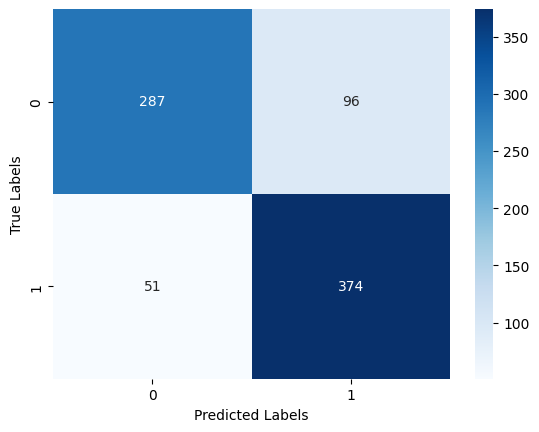

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()